<a href="https://colab.research.google.com/github/valerieefim/portfolio/blob/%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9-%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-(EDA)/%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ефимова Валерия Алексеевна

Номер ИСУ: 336561

Группа: К3244

Почта: valeryefimova@mail.ru

Телеграм: valery_ef  

Для анализа я выбрала тему образования. С помощью сайта Kaggle я нашла несколько датасетов, которые потенциально могли бы быть интересными для рассмотрения. Чтобы выбрать самый удачный из них, я решила изучить датасеты более детально и взять наиболее качественный.

In [ ]:
# для удобства установим библиотеку, которая поможет напрямую скачивать датасеты с Kaggle
!pip install opendatasets > None

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import opendatasets as od
from sklearn.preprocessing import LabelEncoder

#Работа с датасетами

In [ ]:
od.download('https://www.kaggle.com/datasets/susanta21/real-student-mbb-degree-college-data')
od.download('https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention')
od.download('https://www.kaggle.com/datasets/spscientist/students-performance-in-exams')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: valeryefim
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/susanta21/real-student-mbb-degree-college-data


100%|██████████| 426k/426k [00:00<00:00, 34.2MB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

 valeryefim
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention


100%|██████████| 87.2k/87.2k [00:00<00:00, 17.5MB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

 valeryefim
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


100%|██████████| 8.70k/8.70k [00:00<00:00, 3.49MB/s]

Для начала выведем каждый из датасетов в качестве
датафреймов pandas

In [ ]:
df1 = pd.read_csv('/content/real-student-mbb-degree-college-data/Student Degree College Data.csv')
df2 = pd.read_csv('/content/students-performance-in-exams/StudentsPerformance.csv')
df3 = pd.read_csv('/content/higher-education-predictors-of-student-retention/dataset.csv')

In [ ]:
df1

,form_no,name,category,minority,gender,hs_total,hs_pass_year,first_choice_sub,first_choice_marks,second_choice_sub,second_choice_marks,first_choice_stream,second_choice_stream
0,1801371,Susmita Bhowmik,UR,NO,F,381,2018,Mathematics,80,Mathematics,80,Physical Science,Physical Science
1,1803096,Ankur Das,SC,NO,M,262,2018,Education,61,Bengali,58,Arts,Arts
2,1801287,Rashmita Tanti,UR,NO,M,278,2018,Human Physiology,74,Botany,74,Bio Science,Bio Science
3,1803173,Sanjib Ghosh,UR,NO,M,194,2018,NaN,0,NaN,0,Arts,Arts
4,1801077,Swarupa Pal,UR,NO,F,320,2015,NaN,0,NaN,0,Bio Science,Bio Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,301,Alamgir Miah,UR,Muslim,M,190,2018,NaN,0,NaN,0,Arts,Arts
5139,302,Manir Miah,UR,Muslim,M,201,2018,NaN,0,NaN,0,Arts,Arts
5140,303,Subhankar Majumder,UR,NO,M,294,2018,NaN,0,NaN,0,Arts,Arts
5141,401,Utpal Majumder,UR,NO,M,193,2018,NaN,0,NaN,0,Arts,Arts


In [ ]:
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,test preparation course encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


In [ ]:
df3

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Описание датасетов

Сделаем первоначальный анализ датасетов: выявим тип данных каждого столбца

В датасете №1 представлена ​​информация о студентах колледжа общего профиля, где предметы выбираются в соответствии с успеваемостью в средней школе. Включаются касты студентов (датасет содержит информацию о студентах из Индии), пол, год прохождения, оценки по предмету первого приоритета, сам предмет первого приоритета, оценки по предмету второго приоритета и последующие приоритеты.

In [ ]:
description_df1 = pd.DataFrame(
    [['form_no', 'int', 'Номинальная'],
     ['name', 'string', 'Номинальная, 4343 уникальных значений'],
     ['category', 'string', 'Номинальная'],
     ['minority', 'string', 'Номинальная'],
     ['gender', 'string', 'Номинальная, 2 уник. значения'],
     ['hs_total', 'int', 'Относительная, 150-479'],
     ['hs_pass_year', 'int', 'Порядковая, 2009-2018'],
     ['first_choice_sub', 'string', 'Номинальная'],
     ['first_choice_marks', 'int', 'Относительная'],
     ['second_choice_sub', 'string', 'Номинальная']],
    columns=['Признак', 'Тип данных', 'Шкала']
)

In [ ]:
description_df1

Датасет №2
Описывает оценки, полученные учащимися по различным предметам, а также проходили ли они подготовительные курсы.

In [ ]:
description_df2 = pd.DataFrame(
    [['gender', 'string', 'Номинальная, 2 уник. значения'],
     ['race/ethnicity', 'string', 'Номинальная'],
     ['parental level of education', 'string', 'Порядковая'],
     ['lunch', 'string', 'Номинальная, 2 уник. значения'],
     ['test preparation course', 'string', 'Номинальная, 2 уник. значения'],
     ['math score', 'int', 'Относительная, 0-100'],
     ['reading score', 'int', 'Относительная, 17-100'],
     ['writing score', 'int', 'Относительная, 10-100']],
    columns=['Признак', 'Тип данных', 'Шкала']
)

In [ ]:
description_df2

,Признак,Тип данных,Шкала
0,gender,string,"Номинальная, 2 уник. значения"
1,race/ethnicity,string,Номинальная
2,parental level of education,string,Порядковая
3,lunch,string,"Номинальная, 2 уник. значения"
4,test preparation course,string,"Номинальная, 2 уник. значения"
5,math score,int,"Относительная, 0-100"
6,reading score,int,"Относительная, 17-100"
7,writing score,int,"Относительная, 10-100"


Датасет №3 дает представление о студентах, обучающихся на различных курсах бакалавриата. Он включает демографические данные, социально-экономические факторы и информацию об академической успеваемости.

In [ ]:
description_df3 = pd.DataFrame(
    [['Marital status', 'int', 'Номинальная, 1-6'],
     ['Application mode', 'int', 'Номинальная, 1-18'],
     ['Application order', 'int', 'Порядковая, 1-9'],
     ['Course', 'int', 'Номинальная'],
     ['Daytime/evening attendance', 'int', 'Номинальная, 0-1'],
     ['Previous qualification', 'int', 'Номинальная, 1-17'],
     ['Nacionality', 'int', 'Номинальная, 1-21'],
     ["Mother's qualification", 'int', 'Номинальная, 1-29'],
     ["Father's qualification", 'int', 'Номинальная, 1-34'],
     ["Mother's occupation", 'int', 'Номинальная, 1-32'],
     ["Father's occupation", 'int', 'Номинальная, 1-46'],
     ["Displaced", 'int', 'Номинальная, 0-1'],
     ["Educational special needs", 'int', 'Номинальная, 0-1'],
     ["Debtor", 'int', 'Номинальная, 0-1'],
     ["Tuition fees up to date", 'int', 'Номинальная, 0-1'],
     ["Gender", 'int', 'Номинальная, 0-1'],
     ["Scholarship holder", 'int', 'Номинальная, 0-1'],
     ["Age at enrollment", 'int', 'Интервальная, 17-70'],
     ["International", 'int', 'Номинальная, 0-1'],
     ["Curricular units 1st sem (credited)", 'int', 'Относительная, 0-20'],
     ["Curricular units 1st sem (enrolled)", 'int', 'Относительная, 0-26'],
     ["Curricular units 1st sem (evaluations)", 'int', 'Относительная, 0-45'],
     ["Curricular units 1st sem (approved)", 'int', 'Относительная, 0-26'],
     ["Unemployment rate", 'int', 'Относительная, 0-26'],
     ["Inflation rate", 'int', 'Относительная, -0.8-3.7'],
     ["Target", 'int', 'Номинальная, 0-1']],
    columns=['Признак', 'Тип данных', 'Шкала']
)

In [ ]:
description_df3

,Признак,Тип данных,Шкала
0,Marital status,int,"Номинальная, 1-6"
1,Application mode,int,"Номинальная, 1-18"
2,Application order,int,"Порядковая, 1-9"
3,Course,int,Номинальная
4,Daytime/evening attendance,int,"Номинальная, 0-1"
5,Previous qualification,int,"Номинальная, 1-17"
6,Nacionality,int,"Номинальная, 1-21"
7,Mother's qualification,int,"Номинальная, 1-29"
8,Father's qualification,int,"Номинальная, 1-34"
9,Mother's occupation,int,"Номинальная, 1-32"


#Анализ выбранного датасета

Для анализа возьмем датасет №2, так как он оказался наиболее удачным. Датасет №1 содержит много странной информации, а датасет №3 слишком обработан, трудно понять смысл многих столбцов.

Сформулируем гипотезы к датасету №2:

**Гипотеза 1:** Студенты, завершившие подготовительный курс, демонстрируют выше средние баллы по математике, чтению и письму, чем студенты, не проходившие этот курс.

**Гипотеза 2:** Баллы по математике, чтению и письму у студентов будут коррелировать между собой, то есть студенты, показавшие высокие результаты по одному предмету, склонны показать высокие результаты и по другим предметам.

**Гипотеза 3:** Студенты, не завершившие подготовительный курс, имеют большее распределение баллов в своих оценках, чем те, кто завершил курс.

**Гипотеза 4:** Мужчины в среднем получают более высокие баллы по математике, а женщины - по чтению и письму, поэтому средний балл женщин будет выше.

In [ ]:
df = pd.read_csv('/content/students-performance-in-exams/StudentsPerformance.csv')

Проверим датасет на сбалансированность отностельно признака 'gender'

<Axes: xlabel='gender'>

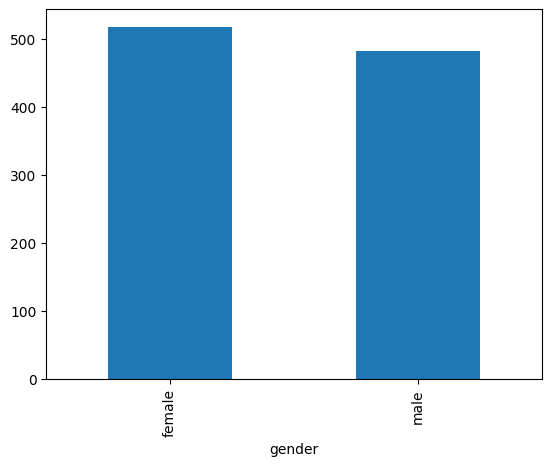

In [ ]:
df['gender'].value_counts().plot(kind='bar')

По результатам подсчетов и визуализации мы выяснили, что количество женщин и мужчин в датасете практически одинаковое.

Для анализа сформулированных гипотез нам не понадобятся некоторые столбцы, поэтому их можно удалить:

In [ ]:
df = df.drop(columns=['race/ethnicity', 'parental level of education', 'lunch'])

Проверим столбцы датасета на наличие нан-значений:

In [ ]:
df.isna().sum()

gender                     0
test preparation course    0
math score                 0
reading score              0
writing score              0
dtype: int64

Наиболее полезные для анализа столбцы - это Series с баллами за экзамены. Проанализируем их. Для начала проверим, есть ли в данных выбросы:

{'whiskers': [<matplotlib.lines.Line2D at 0x790892fe12d0>,
 'caps': [<matplotlib.lines.Line2D at 0x790892fe21a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x790892fe23e0>],
 'medians': [<matplotlib.lines.Line2D at 0x790892bd6080>],
 'fliers': [<matplotlib.lines.Line2D at 0x790892bd6020>],
 'means': []}

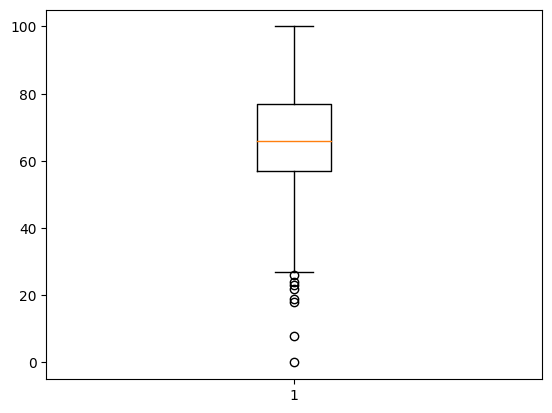

In [ ]:
plt.boxplot(x=df['math score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790892e171c0>,
 'caps': [<matplotlib.lines.Line2D at 0x790892e176a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x790892e168f0>],
 'medians': [<matplotlib.lines.Line2D at 0x790892e14220>],
 'fliers': [<matplotlib.lines.Line2D at 0x790892e14a30>],
 'means': []}

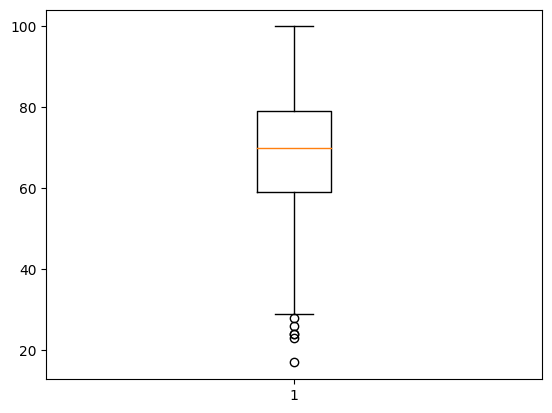

In [ ]:
plt.boxplot(x=df['reading score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790892e4fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x790892e4ef20>,
 'boxes': [<matplotlib.lines.Line2D at 0x790892e4d1e0>],
 'medians': [<matplotlib.lines.Line2D at 0x790892e4c370>],
 'fliers': [<matplotlib.lines.Line2D at 0x790892e4c970>],
 'means': []}

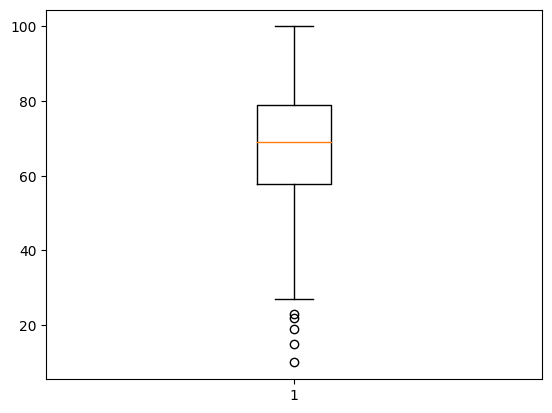

In [ ]:
plt.boxplot(x=df['writing score'])

Выбросы есть - это студенты, которые написали экзамены на относительно низкие баллы (меньше 30 баллов). Посмотрим лучшие результаты по каждому из экзаменов:

In [ ]:
print(df['math score'].max())
print(df['reading score'].max())
print(df['writing score'].max())

100
100
100


Получается, что кто-то из студентов сумел написать тест на наивысший балл. Посмотрим, есть ли студенты, которые написали все экзамены на максимум (300 баллов):

In [ ]:
excellent_students = df[df['math score']+df['reading score']+df['writing score'] == 300]
excellent_students

,gender,test preparation course,math score,reading score,writing score
458,female,none,100,100,100
916,male,completed,100,100,100
962,female,none,100,100,100


Такие студенты есть, их трое. Причем заметим, что двое из них - это студенты, которые не проходили курс подготовки к экзаменам. Перейдем к гипотезам.

### Гипотеза 1

 Студенты, завершившие подготовительный курс, демонстрируют выше средние баллы по математике, чтению и письму, чем студенты, не проходившие этот курс.

In [ ]:
course_true = df[df['test preparation course'] == 'completed']
course_false = df[df['test preparation course'] == 'none']

math_grouped = df.groupby('test preparation course')['math score'].median()
reading_grouped = df.groupby('test preparation course')['reading score'].median()
writing_grouped = df.groupby('test preparation course')['writing score'].median()

math_median_score_df = pd.DataFrame(data=math_grouped).T
reading_median_score_df = pd.DataFrame(data=reading_grouped).T
writing_median_score_df = pd.DataFrame(data=writing_grouped).T

every_median_score_df = pd.concat([math_median_score_df, reading_median_score_df, writing_median_score_df])

every_median_score_df.T

,math score,reading score,writing score
test preparation course,,,
completed,69.0,75.0,76.0
none,64.0,67.0,65.0


Можно понять, что средние значения по трём предметам выше у тех студентов, которые закончили подготовительные курсы. Соответственно, гипотеза 2 верна.

Проведем t-тест, чтобы проверить гипотезу статистически. Для этого сформулируем вспомогательную гипотезу: "Студенты, завершившие подготовительный курс, демонстрируют такие же средние баллы по математике, чтению и письму, как и студенты, не проходившие этот курс".

In [ ]:
import scipy.stats as stats

def t_test(course_true, course_false, subject):
    t_stat, p_value = stats.ttest_ind(course_true, course_false)
    mean_course = np.mean(course_true)
    mean_no_course = np.mean(course_false)

    print(f"{subject}: t-статистика = {t_stat:.2f}, p-значение = {p_value:.4f}")
    print(f"Среднее значение (с курсом) = {mean_course:.2f}, Среднее значение (без курса) = {mean_no_course:.2f}")

    if p_value < 0.05:
        if mean_course > mean_no_course:
            print(f"Студенты, прошедшие подготовительный курс, демонстрируют более высокие баллы по предмету '{subject}'.")
        else:
            print(f"Студенты, не прошедшие подготовительный курс, демонстрируют более высокие баллы по предмету'{subject}'.")
    else:
        print(f"Нет статистически значимого различия в баллах по предмету '{subject}' между группами.")
    print()

# Проведение t-тестов для каждого предмета
t_test(course_true['math score'], course_false['math score'], "Математика")
t_test(course_true['reading score'], course_false['reading score'], "Чтение")
t_test(course_true['writing score'], course_false['writing score'], "Письмо")

Математика: t-статистика = 5.70, p-значение = 0.0000
Среднее значение (с курсом) = 69.70, Среднее значение (без курса) = 64.08
Студенты, прошедшие подготовительный курс, демонстрируют более высокие баллы по предмету 'Математика'.

Чтение: t-статистика = 7.87, p-значение = 0.0000
Среднее значение (с курсом) = 73.89, Среднее значение (без курса) = 66.53
Студенты, прошедшие подготовительный курс, демонстрируют более высокие баллы по предмету 'Чтение'.

Письмо: t-статистика = 10.41, p-значение = 0.0000
Среднее значение (с курсом) = 74.42, Среднее значение (без курса) = 64.50
Студенты, прошедшие подготовительный курс, демонстрируют более высокие баллы по предмету 'Письмо'.



Критерий Стьюдента определяет статистическую значимость различий средних величин. В случае моих данных t-статистика, равная нескольким баллам, значима, поэтому вспомогательная гипотеза отвергается - различия между группами есть.

### Гипотеза 2

Баллы по математике, чтению и письму у студентов будут коррелировать между собой, то есть студенты, показавшие высокие результаты по одному предмету, склонны показать высокие результаты и по другим предметам.

<Axes: >

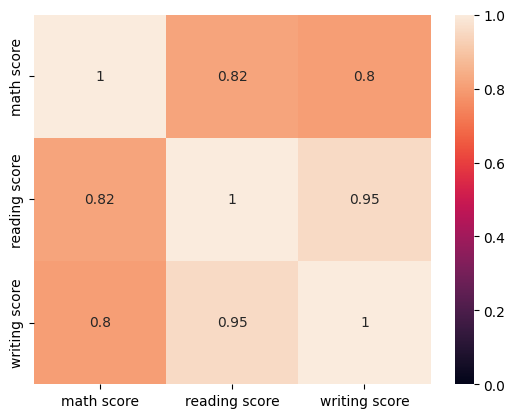

In [ ]:
data = df2.copy()

score_corr = data[['math score', 'reading score', 'writing score']].corr()

sns.heatmap(score_corr, vmin=0, annot=True)

Гипотеза верна. Баллы по различным предметам достаточно сильно коррелируют между собой. Особенно высокой корреляция  оказалась между тестами по чтению и письму.

### Гипотеза 3

Студенты, не завершившие подготовительный курс, имеют большее распределение баллов в своих оценках, чем те, кто завершил курс.

In [ ]:
le = LabelEncoder()
df2['test preparation course encoded']= le.fit_transform(df2['test preparation course'])

df2_with_courses = df2[df2['test preparation course encoded'] == 0]
df2_no_courses = df2[df2['test preparation course encoded'] == 1]

Text(0, 0.5, 'Количество студентов')

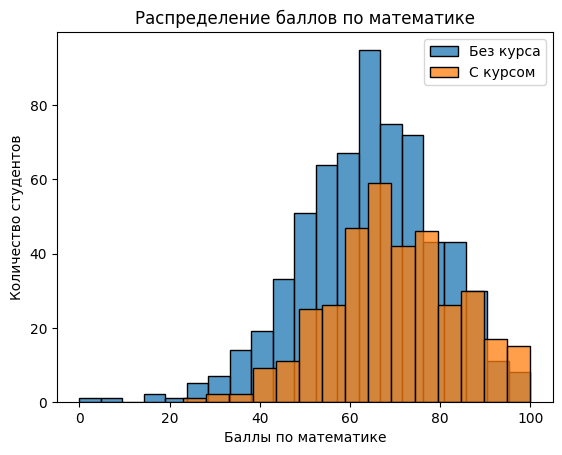

In [ ]:
# распределение баллов по математике
sns.histplot(data=df2_no_courses, x='math score')
sns.histplot(data=df2_with_courses, x='math score')

plt.title('Распределение баллов по математике')
plt.legend(labels=['Без курса', 'С курсом'])
plt.xlabel('Баллы по математике')
plt.ylabel('Количество студентов')

Text(0, 0.5, 'Количество студентов')

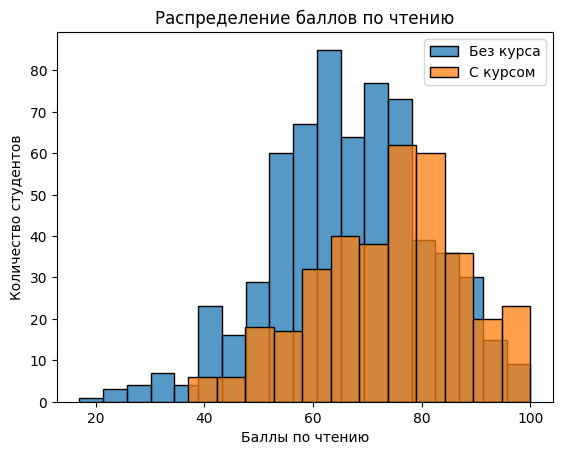

In [ ]:
# распределение баллов по чтению
sns.histplot(data=df2_no_courses, x='reading score')
sns.histplot(data=df2_with_courses, x='reading score')

plt.title('Распределение баллов по чтению')
plt.legend(labels=['Без курса', 'С курсом'])
plt.xlabel('Баллы по чтению')
plt.ylabel('Количество студентов')

In [ ]:
# распределение баллов по письму
sns.histplot(data=df2_no_courses, x='writing score')
sns.histplot(data=df2_with_courses, x='writing score')

plt.title('Распределение баллов по письму')
plt.legend(labels=['Без курса', 'С курсом'])
plt.xlabel('Баллы по письму')
plt.ylabel('Количество студентов')

Также проверим гипотезу с точки зрения статистического критерия "Размах":

In [ ]:
# это разность между максимальным и минимальным значением
def difference(df, column):
  min_result = df[column].min()
  max_result = df[column].max()
  diff = max_result - min_result
  print(f'{column}: {diff}')

print('С курсами')
difference(df2_with_courses, 'math score')
difference(df2_with_courses, 'reading score')
difference(df2_with_courses, 'writing score')

print()
print('Без курсов')
difference(df2_no_courses, 'math score')
difference(df2_no_courses, 'reading score')
difference(df2_no_courses, 'writing score')

С курсами
math score: 77
reading score: 63
writing score: 64

Без курсов
math score: 100
reading score: 83
writing score: 90


Гипотеза подтвердилась: баллы людей, которые не проходили подготовительные курсы, имеют более широкий разброс по сравнению с баллами тех, кто их проходил.

### Гипотеза 4

Мужчины в среднем получают более высокие баллы по математике, а женщины - по чтению и письму, поэтому средний балл женщин будет выше.

Посмотрим среднее значение суммы за 3 экзамена для каждого пола:

In [ ]:
# добавим вспомогательный столбец 'sum' с суммой баллов за экзамены
df['sum'] = df['math score'] + df['reading score'] + df['writing score']
df

In [ ]:
# закодируем нечисловой признак
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
df

In [ ]:
df_corr = pd.DataFrame()
df_corr['gender'] = df['gender_encoded']
df_corr['sum'] = df['sum']
df_corr

In [ ]:
df_corr.groupby('gender').median()

Итог: средний балл женщин выше среднего балла мужчин по 3-м экзаменам. Проверим первую часть гипотезы. Для этого рассмотрим среднее значение баллов мужчин и женщин по каждому экзамену:

In [ ]:
df_corr['math'] = df['math score']
df_corr['writing'] = df['writing score']
df_corr['reading'] = df['reading score']
df_corr

In [ ]:
df_corr.groupby('gender').median()

Гипотеза оказалось верной: женщины лучше пишут экзамены по письму и чтению и имеют больший средний балл по 3-м предметам, однако уступают мужчинам относительно экзамена по математике.

# Общие выводы по датасету

Благодаря проверке гипотез удалось выяснить, что студенты, проходившие дополнительные курсы для подготовки к экзаменам, показали более хороший результат, чем тем, кто не посещал допзанятия.

Плюс ко всему, если студент достаточно умный, у него получается писать экзамены по всем предметам на высокий балл.

Также подтвердили гипотезу, которая связывает пол и результаты экзаменов.